# Prediciendo ventas de productos

**Objetivo**: predecir las ventas de productos en función del presupuesto dedicado en publicidad en 3 medios: TV, radio y diario.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [54]:
# Cargar el dataset
df = pd.read_csv("./datasets/advertising.csv")

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [56]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [57]:
print("Cantidad de nulos:\n", df.isnull().sum())

Cantidad de nulos:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


## Analisis exploratorio de datos (EDA)

A continuación, se presentan algunas visualizaciones para entender mejor el dataset.

In [58]:
from importlib import reload

import utils.plot as ploty

reload(ploty)

features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'

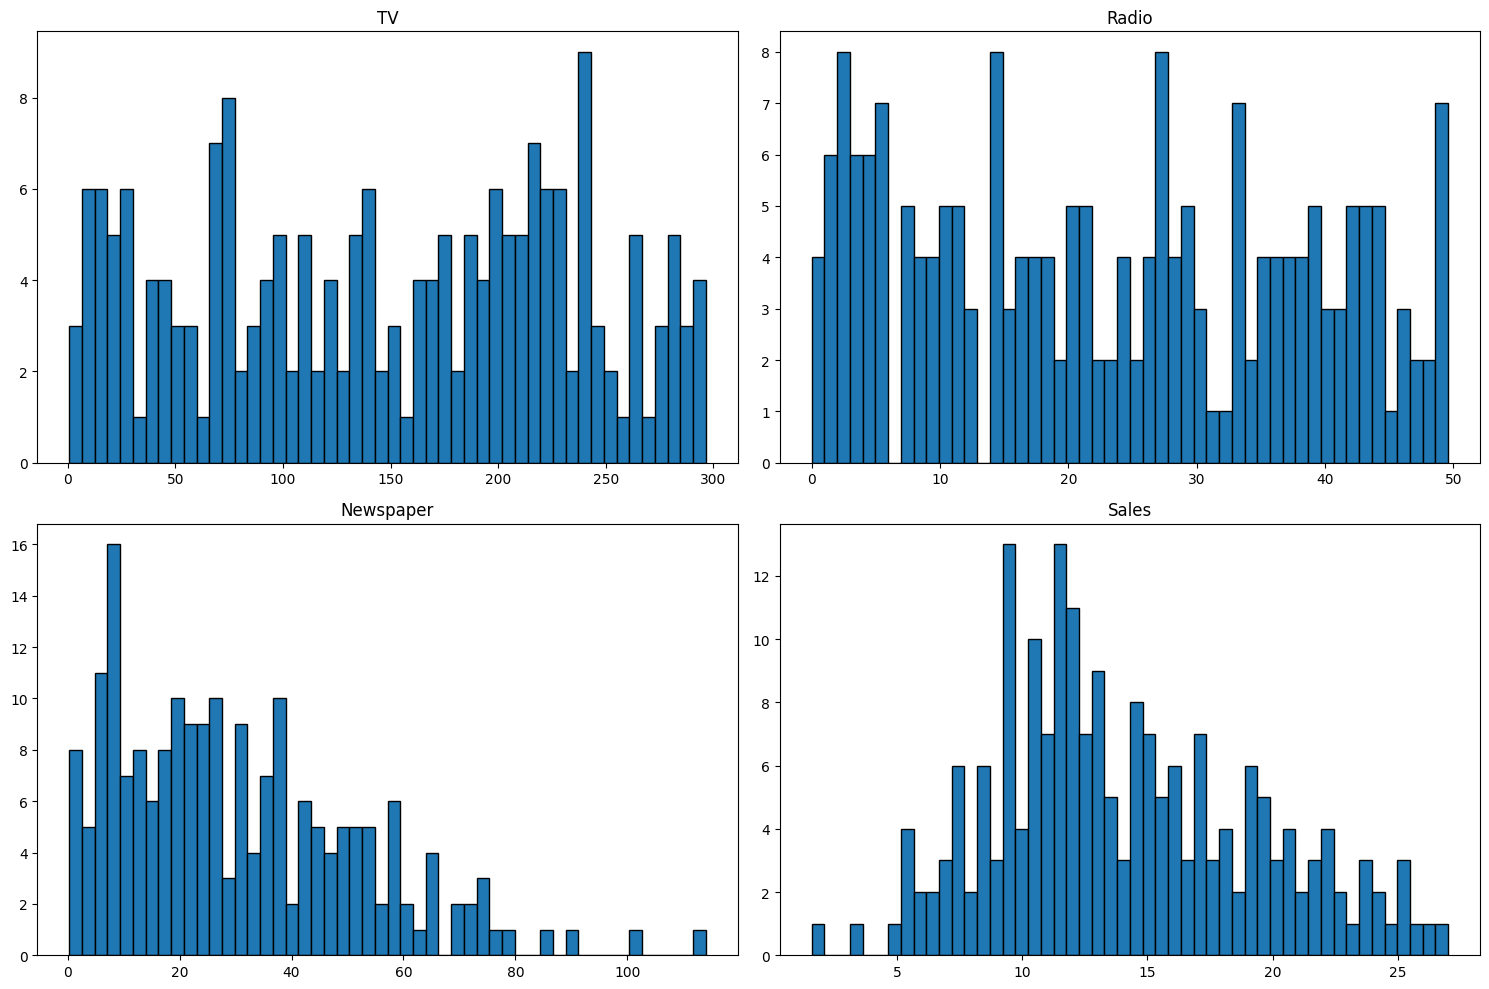

In [59]:
# Graficamos los histogramas de las características y el target
ploty.histogram(df, columns=features+[target], nrow=2, ncol=2)

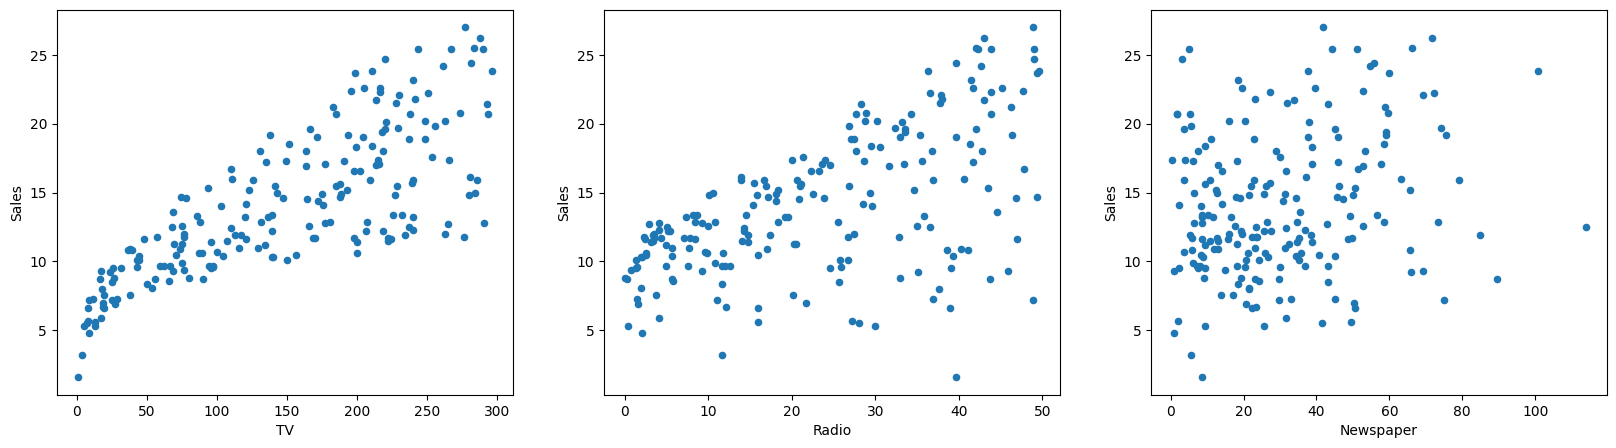

In [60]:
# Gráficos de dispersión entre las características y el target
ploty.scatter(df, features, target, nrow=1, ncol=3)

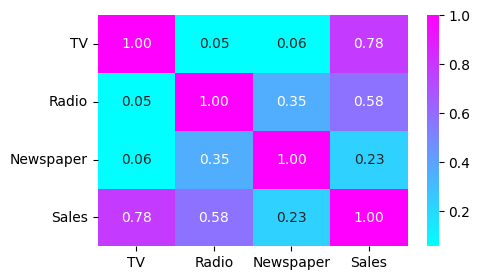

In [61]:
# Graficamos la correlación cruzada
ploty.correlation_heatmap(df)

Vemos que el medio que más relación tiene con las ventas es la publicidad en TV.

## Entrenamiento del modelo 

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
X = df[['TV']]
y = df['Sales']

X.shape, y.shape

((200, 1), (200,))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Validación del modelo

In [66]:
from sklearn.metrics import (r2_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             root_mean_squared_error, 
                             mean_absolute_percentage_error)

#### Entrenamiento

In [67]:
print(f"El coeficiente de Pearson es {round(model.score(X_train, y_train), 2)}")

El coeficiente de Pearson es 0.57


In [68]:
y_train_pred = model.predict(X_train)

r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = root_mean_squared_error(y_train, y_train_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)

print("R2:", round(r2, 3))
print("Error absoluto medio (MAE):", round(mae, 3))
print("Error cuadrático medio (MSE):", round(mse, 3))
print("Raíz de error cuadrático medio (RMSE):", round(rmse, 3))
print(f"Error absoluto porcentual medio (MAPE): {mape*100:.2f}%")

R2: 0.574
Error absoluto medio (MAE): 2.683
Error cuadrático medio (MSE): 11.189
Raíz de error cuadrático medio (RMSE): 3.345
Error absoluto porcentual medio (MAPE): 22.05%


#### Evaluación

In [69]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2:", round(r2, 3))
print("Error absoluto medio (MAE):", round(mae, 3))
print("Error cuadrático medio (MSE):", round(mse, 3))
print("Raíz de error cuadrático medio (RMSE):", round(rmse, 3))
print(f"Error absoluto porcentual medio (MAPE): {mape*100:.2f}%")

R2: 0.671
Error absoluto medio (MAE): 2.276
Error cuadrático medio (MSE): 8.971
Raíz de error cuadrático medio (RMSE): 2.995
Error absoluto porcentual medio (MAPE): 18.07%


## (Bonus) Entrenamiento del modelo con datos normalizados

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled[:5, :]

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ]])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
print(f"El coeficiente de Pearson es {round(model.score(X_train, y_train), 2)}")

El coeficiente de Pearson es 0.57


In [74]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2:", round(r2, 3))
print("Error absoluto medio (MAE):", round(mae, 3))
print("Error cuadrático medio (MSE):", round(mse, 3))
print("Raíz de error cuadrático medio (RMSE):", round(rmse, 3))
print(f"Error absoluto porcentual medio (MAPE): {mape*100:.2f}%")

R2: 0.671
Error absoluto medio (MAE): 2.276
Error cuadrático medio (MSE): 8.971
Raíz de error cuadrático medio (RMSE): 2.995
Error absoluto porcentual medio (MAPE): 18.07%


Vemos que no hay diferencia, probablemente porque las escalas de las características no son tan diferentes entre sí.

# (Bonus) Entramiento del modelo con otras variables

In [ ]:
from sklearn.metrics import mean_squared_error

def regresion_lineal(X: pd.DataFrame, 
                     y: pd.Series,
                     metric="mean_squared_error"):
    """
    Input
        X, y: Datos
        metric: Métrica a usar
    Output
        El modelo y métricas
    """

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred  = mean_squared_error(y_train, model.predict(X_train))

    y_test_pred  = mean_squared_error(y_test, model.predict(X_test))
    

    print(f"El MSE en entrenamiento={y_train_pred:.3f} y en validación={y_test_pred:.3f} para la variable {X.columns[0]}")
    
    return model


In [76]:
modelo_radio = regresion_lineal(df[["Radio"]], y)

modelo_diario = regresion_lineal(df[["Newspaper"]], y)

El MSE en entrenamiento=16.016 y en validación=23.723 para la variable Radio
El MSE en entrenamiento=24.662 y en validación=28.869 para la variable Newspaper


Se puede observar que el MSE para "Radio" y "Newspaper" son mayores que el MSE del modelo con "TV", lo que indica que "TV" es la variable que mejor predice las ventas en este caso.